# Libraries

In [2]:
#pip install matplotlib

In [3]:
#pip install -U imbalanced-learn

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from bokeh.io import curdoc, output_notebook
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper, Slider
from bokeh.layouts import row, layout
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import ConfusionMatrixDisplay

# Machine learning preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score
from sklearn.datasets import make_classification,make_regression
import joblib


# Machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Machine learning metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn import metrics

# Settings to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#!pip install tensorflow
#!pip install keras

In [3]:
#from google.colab import files
#uploades = files.upload()

In [4]:
loan = pd.read_csv('loan_train.csv')

In [5]:
loan.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [6]:
loan.isnull()

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0      False   False    False       False      False          False   
1      False   False    False       False      False          False   
2      False   False    False       False      False          False   
3      False   False    False       False      False          False   
4      False   False    False       False      False          False   
..       ...     ...      ...         ...        ...            ...   
609    False   False    False       False      False          False   
610    False   False    False       False      False          False   
611    False   False    False       False      False          False   
612    False   False    False       False      False          False   
613    False   False    False       False      False          False   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0              False              False        True             False   
1              False              False       False             False   
2              False              False       False             False   
3              False              False       False             False   
4              False              False       False             False   
..               ...                ...         ...               ...   
609            False              False       False             False   
610            False              False       False             False   
611            False              False       False             False   
612            False              False       False             False   
613            False              False       False             False   

     Credit_History  Property_Area  Loan_Status  
0             False          False        False  
1             False          False        False  
2             False          False        False  
3             False          False        False  
4             False          False        False  
..              ...            ...          ...  
609           False          False        False  
610           False          False        False  
611           False          False        False  
612           False          False        False  
613           False          False        False  

[614 rows x 13 columns]

In [7]:
#Dropping Loan_ID from df loan
loan = loan.drop('Loan_ID', axis=1)

In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [9]:
loan['ApplicantIncome'] = loan['ApplicantIncome'].astype('float64')

In [10]:
loan.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [11]:
#Check frequency of categorical columns

categoricalcolumns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

for column in categoricalcolumns:
    print(f"Value counts for {column}:")
    print(loan[column].value_counts())
    print()

Value counts for Gender:
Male      489
Female    112
Name: Gender, dtype: int64

Value counts for Married:
Yes    398
No     213
Name: Married, dtype: int64

Value counts for Dependents:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Value counts for Education:
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Value counts for Self_Employed:
No     500
Yes     82
Name: Self_Employed, dtype: int64

Value counts for Property_Area:
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Value counts for Loan_Status:
Y    422
N    192
Name: Loan_Status, dtype: int64



In [12]:
loan.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

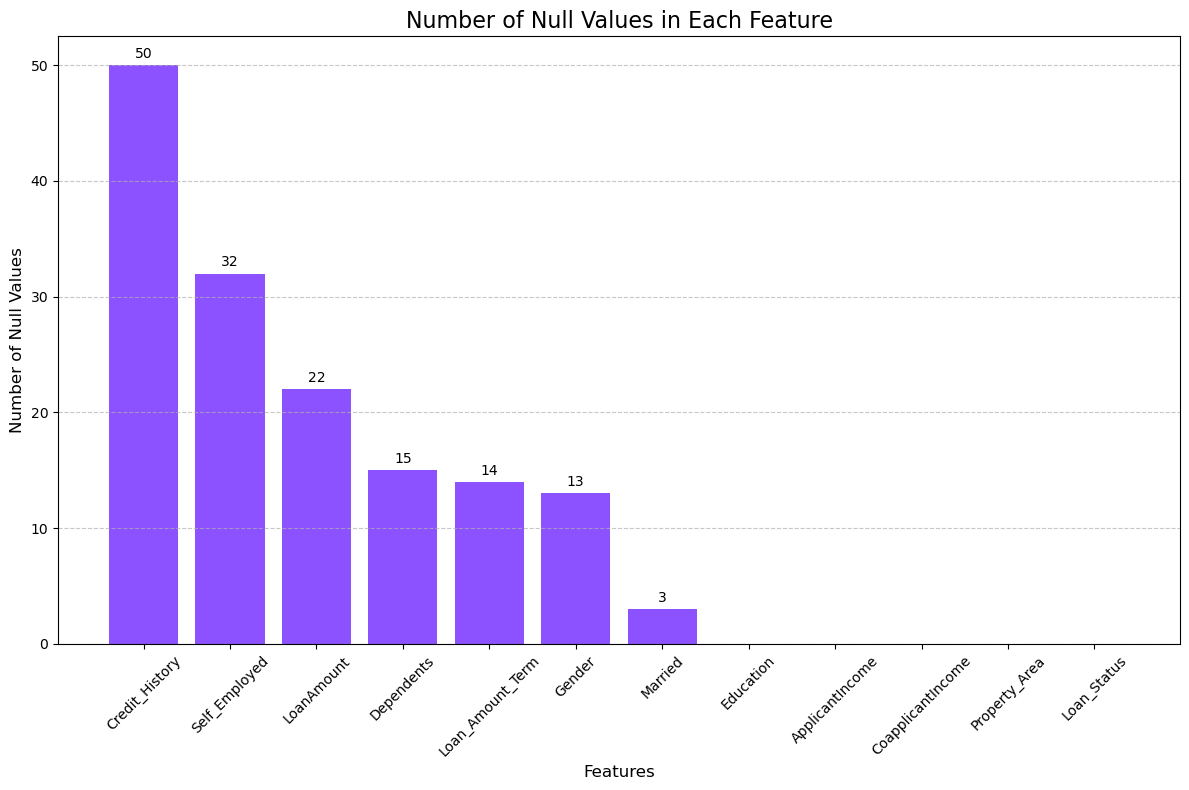

In [13]:
import matplotlib.pyplot as plt

# Given null value counts for each column
null_values = {
    "Credit_History": 50,
    "Self_Employed": 32,
    "LoanAmount": 22,
    "Dependents": 15,
    "Loan_Amount_Term": 14,
    "Gender": 13,
    "Married": 3,
    "Education": 0,
    "ApplicantIncome": 0,
    "CoapplicantIncome": 0,
    "Property_Area": 0,
    "Loan_Status": 0,
}

# Colors for the bars
colors = ['#8C52FF' if value > 0 else '#b085f5' for value in null_values.values()]

# Create a bar chart
fig, ax = plt.subplots(figsize=(12, 8))  # Set the figure size as desired
bars = ax.bar(null_values.keys(), null_values.values(), color=colors)

# Add the text annotation on top of the bars
for bar in bars:
    height = bar.get_height()
    if height > 1:
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Aesthetics
plt.title('Number of Null Values in Each Feature', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Number of Null Values', fontsize=12)
ax.set_xticklabels(null_values.keys(), rotation=45)
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlap

# Show grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [14]:
# After imputation, if you want 'Credit_History' to be an integer type (0 or 1), you may need to round the values
loan['Credit_History'] = loan['Credit_History'].round().astype('float64')

In [15]:
# List of columns to check for missing values
columns_to_check = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term']

# Check if each of these columns is missing, but Credit_History is not missing
rows_with_missing_values = loan[loan[columns_to_check].isna().any(axis=1) & loan['Credit_History'].notna()]

# Count the number of such rows
count = len(rows_with_missing_values)

print(f"There are {count} rows with missing values in the specified columns but with Credit_History data present.")

There are 84 rows with missing values in the specified columns but with Credit_History data present.


In [16]:
#Simple imputer is used here

# For categorical columns
imputer_mode = SimpleImputer(strategy='most_frequent')
loan['Gender'] = imputer_mode.fit_transform(loan[['Gender']])
loan['Married'] = imputer_mode.fit_transform(loan[['Married']])
loan['Dependents'] = imputer_mode.fit_transform(loan[['Dependents']])
loan['Self_Employed'] = imputer_mode.fit_transform(loan[['Self_Employed']])

# For numerical columns
imputer_median = SimpleImputer(strategy='median')
loan['LoanAmount'] = imputer_median.fit_transform(loan[['LoanAmount']])
loan['Loan_Amount_Term'] = imputer_median.fit_transform(loan[['Loan_Amount_Term']])

In [17]:
loan.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
unique_credit_histories = loan['Credit_History'].unique()

print("Unique values in 'Credit_History' column:")
print(unique_credit_histories)

Unique values in 'Credit_History' column:
[ 1.  0. nan]


In [19]:
# KNNImputer

# Use 'n_neighbors'parameter
imputer = KNNImputer(n_neighbors=3, weights='uniform')

influeners = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

loan[influeners] = imputer.fit_transform(loan[influeners])

In [20]:
loan.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


# Data vizualisations

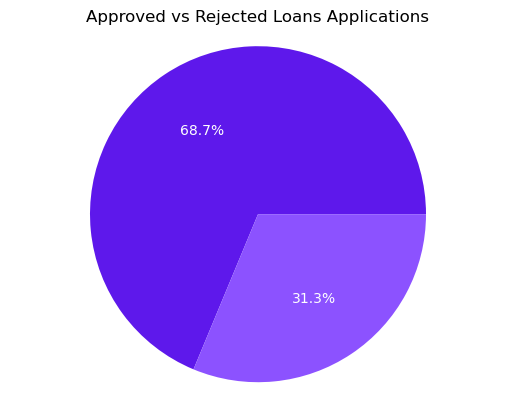

In [22]:
#Matplotlib is used here

labels = ['Approved', 'Rejected']
sizes = loan.Loan_Status.value_counts(normalize=True)
colors = ['#5E18EB', '#8C52FF']

# plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '',
        textprops={'color':"white"})
plt.axis('equal')
plt.title('Approved vs Rejected Loans Applications')
plt.show()

In [23]:
unique_credit_histories1 = loan['Loan_Status'].unique()

print("Unique values in 'Loan_Status' column:")
print(unique_credit_histories1)

Unique values in 'Loan_Status' column:
['Y' 'N']


In [24]:
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [25]:
# Define categories and corresponding colors
categories = ['Y', 'N']
category_colors = ['#5E18EB', '#8C52FF']
color_mapping = {'Y': category_colors[0], 'N': category_colors[1]}

# Plot the histogram with LoanAmount on the x-axis and stacked Loan_Status
fig = px.histogram(loan,
                   x="LoanAmount",
                   color="Loan_Status",
                   color_discrete_map=color_mapping,
                   barmode='stack',
                   title='Stacked Distribution of Loan Status by Loan Amount',
                   labels={'LoanAmount': 'Loan Amount'},
                   text_auto=True)

# Update layout for centering the title and adjusting y-axis title
fig.update_layout(title_x=0.5, yaxis_title='Number of Loan Applications - Approved and Rejected')

# Show the plot
fig.show()

In [26]:
# Define categories and corresponding colors
category_colors = ['#5E18EB', '#8C52FF']
color_mapping = {'Y': category_colors[0], 'N': category_colors[1]}

# Determine the range for bins based on the max ApplicantIncome
max_income = loan['ApplicantIncome'].max()
bin_size = 2000  # Set bin size to $2,500
nbins = int(max_income / bin_size)  # Determine the number of bins needed

# Plot the histogram with ApplicantIncome on the x-axis and stacked Loan_Status
fig = px.histogram(loan,
                   x="ApplicantIncome",
                   color="Loan_Status",
                   color_discrete_map=color_mapping,
                   barmode='stack',
                   title='Stacked Distribution of Loan Status based on ApplicantIncome',
                   labels={'ApplicantIncome': 'Applicant Income'},
                   text_auto=True,
                   nbins=nbins)  # Here we set the number of bins

# Update layout for centering the title and adjusting y-axis title
fig.update_layout(
    title_x=0.5,
    yaxis_title='Number of Loan Applications - Approved and Rejected',
    xaxis=dict(
        # Update the xaxis properties for tick intervals at every $2,500
        tickvals=[i * bin_size for i in range(nbins+1)],  # This will set tick marks every 2.5k
        ticktext=[f"{i * bin_size / 1000}k" for i in range(nbins+1)]  # Labels the ticks as '2.5k', '5k', etc.
    )
)

# Show the plot
fig.show()

In [27]:
# Define categories and corresponding colors
category_colors = ['#5E18EB', '#8C52FF']
color_mapping = {'Y': category_colors[0], 'N': category_colors[1]}

# Determine the range for bins based on the max ApplicantIncome
max_income = loan['CoapplicantIncome'].max()
bin_size = 2000  # Set bin size to $2,500
nbins = int(max_income / bin_size)  # Determine the number of bins needed

# Plot the histogram with ApplicantIncome on the x-axis and stacked Loan_Status
fig = px.histogram(loan,
                   x="CoapplicantIncome",
                   color="Loan_Status",
                   color_discrete_map=color_mapping,
                   barmode='stack',
                   title='Stacked Distribution of Loan Status based on CoapplicantIncome',
                   labels={'CoapplicantIncome': 'Coapplicant Income'},
                   text_auto=True,
                   nbins=nbins)  # Here we set the number of bins

# Update layout for centering the title and adjusting y-axis title
fig.update_layout(
    title_x=0.5,
    yaxis_title='Number of Loan Applications - Approved and Rejected',
    xaxis=dict(
        # Update the xaxis properties for tick intervals at every $2,500
        tickvals=[i * bin_size for i in range(nbins+1)],  # This will set tick marks every 2.5k
        ticktext=[f"{i * bin_size / 1000}k" for i in range(nbins+1)]  # Labels the ticks as '2.5k', '5k', etc.
    )
)

# Show the plot
fig.show()

In [28]:
# Define categories and corresponding colors
categories = ['Y', 'N']
category_colors = ['#5E18EB', '#8C52FF']
color_mapping = {'Y': category_colors[0], 'N': category_colors[1]}

# Plot the histogram with ApplicantIncome on the x-axis and stacked Loan_Status
fig = px.histogram(loan,
                   x="Credit_History",
                   color="Loan_Status",
                   color_discrete_map=color_mapping,
                   barmode='stack',
                   title='Stacked Distribution of Loan Status based on Credit_History',
                   labels={'Loan_Status': 'Credit_History'},
                   text_auto='.2s')

fig.update_traces(textfont_size=12)

# Update layout for centering the title, adjusting y-axis title, and making the text larger
fig.update_layout(
    title_x=0.5,
    yaxis_title='Number of Loans Applications based on Credit_History',
    xaxis_tickformat='s',
    hoverlabel=dict(font_size=16),
    width=1000,
    height=800
)

# Show the plot
fig.show()

In [29]:
unique_credit_histories = loan['Credit_History'].unique()

print("Unique values in 'Credit_History' column:")
print(unique_credit_histories)

Unique values in 'Credit_History' column:
[1.         0.         0.66666667 0.33333333]


In [30]:
# Define categories and corresponding colors
categories = ['Y', 'N']
category_colors = ['#5E18EB', '#8C52FF']
color_mapping = {'Y': category_colors[0], 'N': category_colors[1]}

# Plot the histogram with LoanAmount on the x-axis and stacked Loan_Status
fig = px.histogram(loan,
                   x="Education",
                   color="Loan_Status",
                   color_discrete_map=color_mapping,
                   barmode='stack',
                   title='Stacked Distribution of Loan Status by Education',
                   labels={'Education': 'Education'},
                   text_auto=True)

# Update layout for centering the title and adjusting y-axis title
fig.update_layout(title_x=0.5, yaxis_title='Number of Loan Applications - Approved and Rejected')

# Show the plot
fig.show()

In [31]:
# Define categories and corresponding colors
categories = ['Y', 'N']
category_colors = ['#5E18EB', '#8C52FF']
color_mapping = {'Y': category_colors[0], 'N': category_colors[1]}

# Plot the histogram with LoanAmount on the x-axis and stacked Loan_Status
fig = px.histogram(loan,
                   x="Gender",
                   color="Loan_Status",
                   color_discrete_map=color_mapping,
                   barmode='stack',
                   title='Stacked Distribution of Loan Status by Gender',
                   labels={'Gender': 'Gender'},
                   text_auto=True)

# Update layout for centering the title and adjusting y-axis title
fig.update_layout(title_x=0.5, yaxis_title='Number of Loan Applications - Approved and Rejected')

# Show the plot
fig.show()

In [32]:
# Define categories and corresponding colors
categories = ['Y', 'N']
category_colors = ['#5E18EB', '#8C52FF']
color_mapping = {'Y': category_colors[0], 'N': category_colors[1]}

# Plot the histogram with LoanAmount on the x-axis and stacked Loan_Status
fig = px.histogram(loan,
                   x="Married",
                   color="Loan_Status",
                   color_discrete_map=color_mapping,
                   barmode='stack',
                   title='Stacked Distribution of Loan Status by Marital Status',
                   labels={'Married': 'Married'},
                   text_auto=True)

# Update layout for centering the title and adjusting y-axis title
fig.update_layout(title_x=0.5, yaxis_title='Number of Loan Applications - Approved and Rejected')

# Show the plot
fig.show()

In [33]:
# Define categories and corresponding colors
categories = ['Y', 'N']
category_colors = ['#5E18EB', '#8C52FF']
color_mapping = {'Y': category_colors[0], 'N': category_colors[1]}

# Plot the histogram with LoanAmount on the x-axis and stacked Loan_Status
fig = px.histogram(loan,
                   x="Dependents",
                   color="Loan_Status",
                   color_discrete_map=color_mapping,
                   barmode='stack',
                   title='Stacked Distribution of Loan Status by Dependents',
                   labels={'Dependents': 'Dependents'},
                   text_auto=True)

# Update layout for centering the title and adjusting y-axis title
fig.update_layout(title_x=0.5, yaxis_title='Number of Loan Applications - Approved and Rejected')

# Show the plot
fig.show()

In [34]:
# Define categories and corresponding colors
categories = ['Y', 'N']
category_colors = ['#5E18EB', '#8C52FF']
color_mapping = {'Y': category_colors[0], 'N': category_colors[1]}

# Plot the histogram with LoanAmount on the x-axis and stacked Loan_Status
fig = px.histogram(loan,
                   x="Self_Employed",
                   color="Loan_Status",
                   color_discrete_map=color_mapping,
                   barmode='stack',
                   title='Stacked Distribution of Loan Status by Self_Employed',
                   labels={'Self_Employed': 'Self_Employed'},
                   text_auto=True)

# Update layout for centering the title and adjusting y-axis title
fig.update_layout(title_x=0.5, yaxis_title='Number of Loan Applications - Approved and Rejected')

# Show the plot
fig.show()

In [35]:
# Define categories and corresponding colors
categories = ['Y', 'N']
category_colors = ['#5E18EB', '#8C52FF']
color_mapping = {'Y': category_colors[0], 'N': category_colors[1]}

# Plot the histogram with LoanAmount on the x-axis and stacked Loan_Status
fig = px.histogram(loan,
                   x="Property_Area",
                   color="Loan_Status",
                   color_discrete_map=color_mapping,
                   barmode='stack',
                   title='Stacked Distribution of Loan Status by Property_Area',
                   labels={'Property_Area': 'Property_Area'},
                   text_auto=True)

# Update layout for centering the title and adjusting y-axis title
fig.update_layout(title_x=0.5, yaxis_title='Number of Loan Applications - Approved and Rejected')

# Show the plot
fig.show()

In [36]:
# Define categories and corresponding colors
categories = ['Y', 'N']
category_colors = ['#5E18EB', '#8C52FF']
color_mapping = {'Y': category_colors[0], 'N': category_colors[1]}

# Plot the histogram with LoanAmount on the x-axis and stacked Loan_Status
fig = px.histogram(loan,
                   x="Loan_Amount_Term",
                   color="Loan_Status",
                   color_discrete_map=color_mapping,
                   barmode='stack',
                   title='Stacked Distribution of Loan Status by Loan amount term',
                   labels={'Loan_Amount_Term': 'Loan_Amount_Term'},
                   text_auto=True)

# Update layout for centering the title and adjusting y-axis title
fig.update_layout(title_x=0.5, yaxis_title='Number of Loan Applications - Approved and Rejected')

# Show the plot
fig.show()

In [37]:
numerical=loan.select_dtypes([np.number]).columns
print(numerical)
categorycol=loan.select_dtypes('object').columns
print(categorycol)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')


In [38]:
le = LabelEncoder()
categoricalfeatures = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area', 'Loan_Status']
for col in loan[categoricalfeatures]:
    loan[col]=le.fit_transform(loan[col])

In [39]:
#Create a StandardScaler object
scaler = StandardScaler()
# Select the columns to be normalized
normalizedcols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']
# Fit the scaler to the selected columns and transform the data
loan[normalizedcols] = scaler.fit_transform(loan[normalizedcols])

In [40]:
loan.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          0              0         0.072991   
1       1        1           1          0              0        -0.134412   
2       1        1           0          0              1        -0.393747   
3       1        1           0          1              0        -0.462062   
4       1        0           0          0              0         0.097728   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0          -0.554487   -0.211241          0.273231        0.440663   
1          -0.038732   -0.211241          0.273231        0.440663   
2          -0.554487   -0.948996          0.273231        0.440663   
3           0.251980   -0.306435          0.273231        0.440663   
4          -0.554487   -0.056551          0.273231        0.440663   

   Property_Area  Loan_Status  
0              2            1  
1              0            0  
2              2            1  
3              2            1  
4              2            1

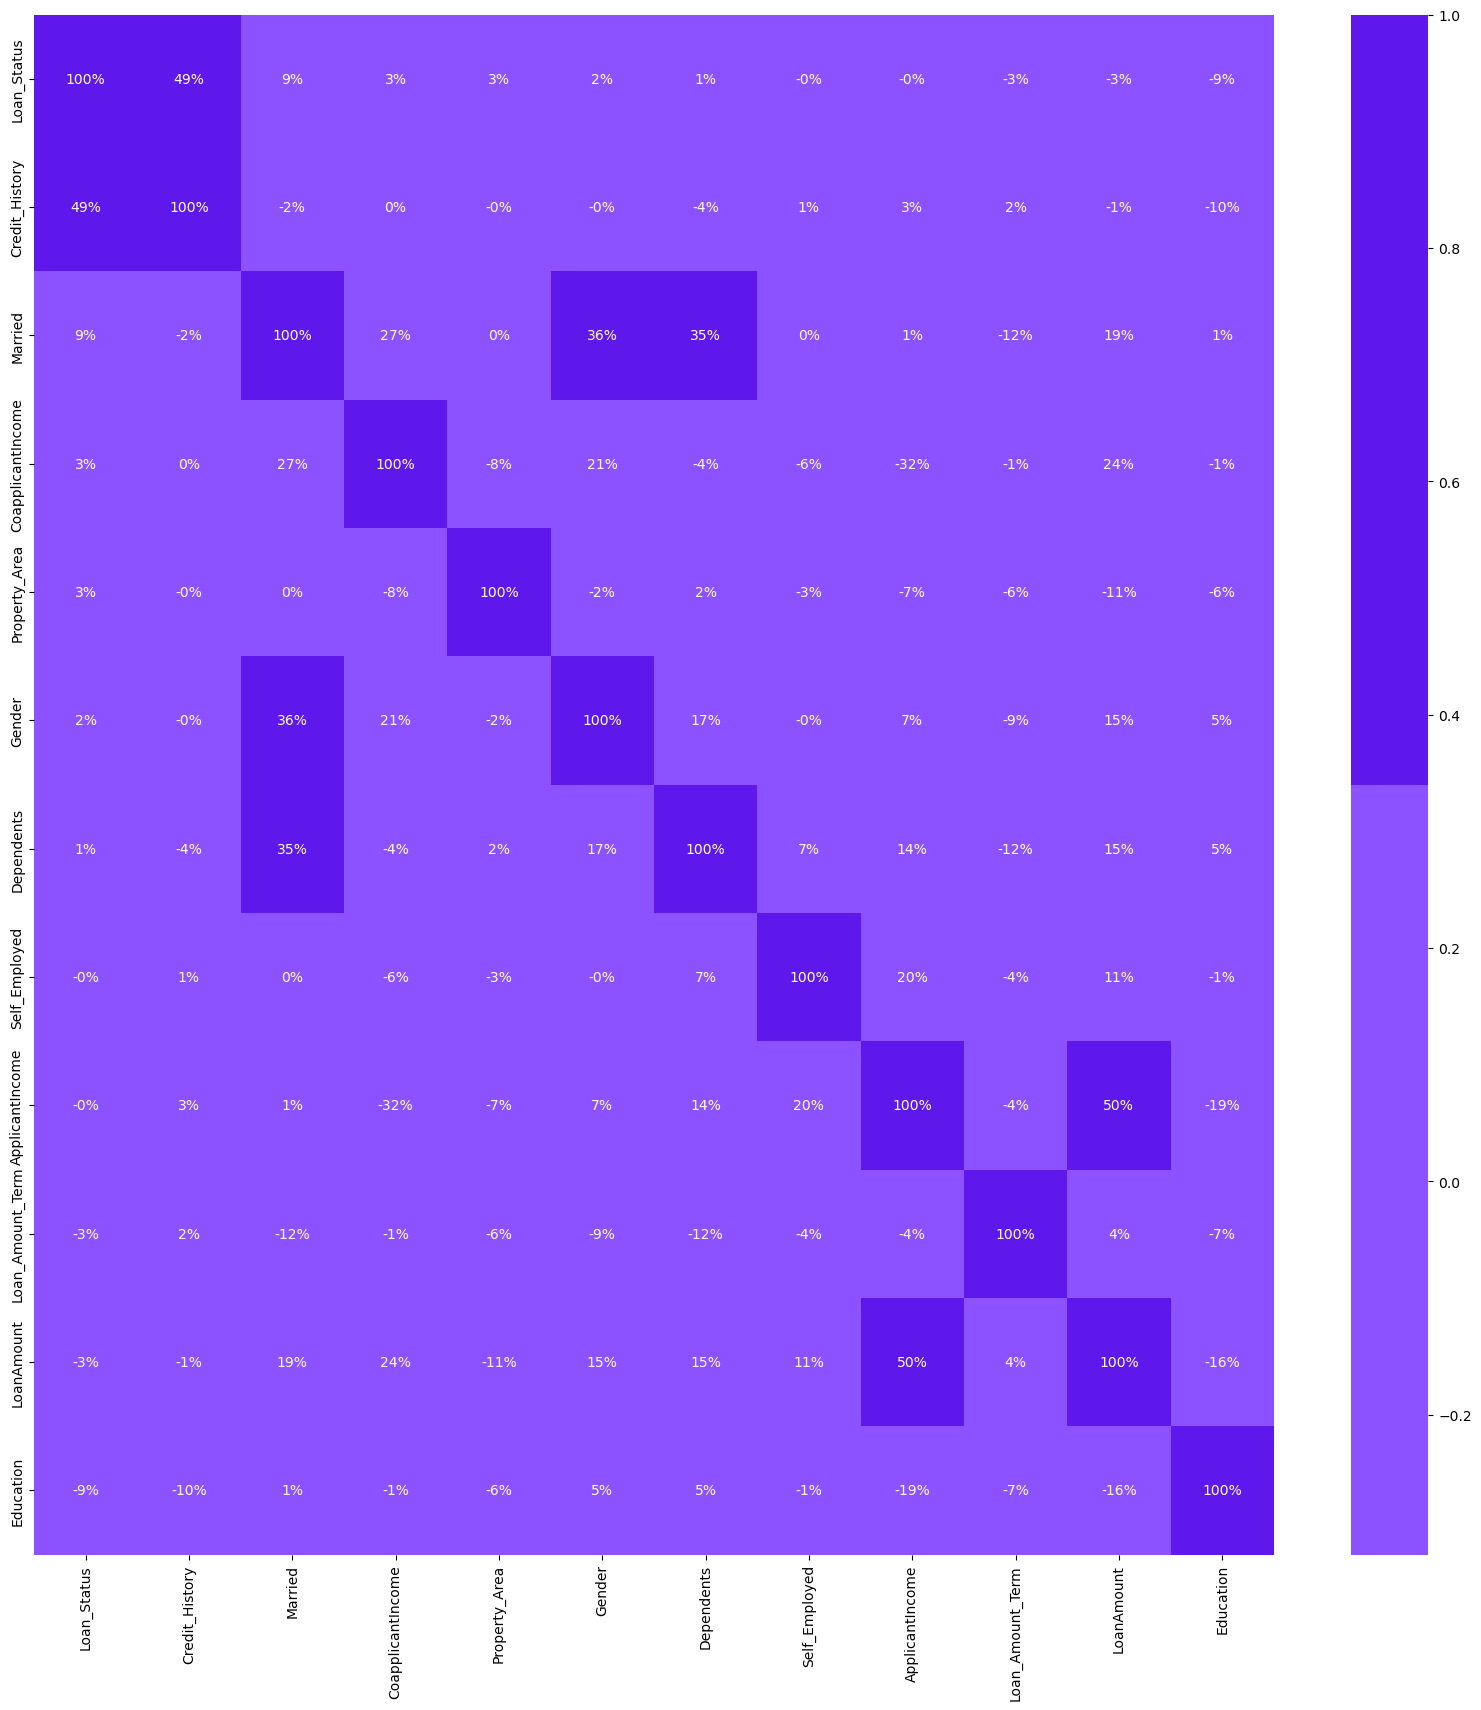

In [41]:
custom_cmap = ListedColormap(['#8C52FF','#5E18EB'])

# Create a correlation matrix with method='spearman'
corr_matrix = loan.corr(method='spearman')

# Sort the features by their correlation values with the target variable
target_variable = 'Loan_Status'
sorted_features = corr_matrix[target_variable].sort_values(ascending=False)

# Plot a heatmap of the sorted correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix.loc[sorted_features.index, sorted_features.index], annot=True, fmt='.0%', cmap=custom_cmap)
plt.show()

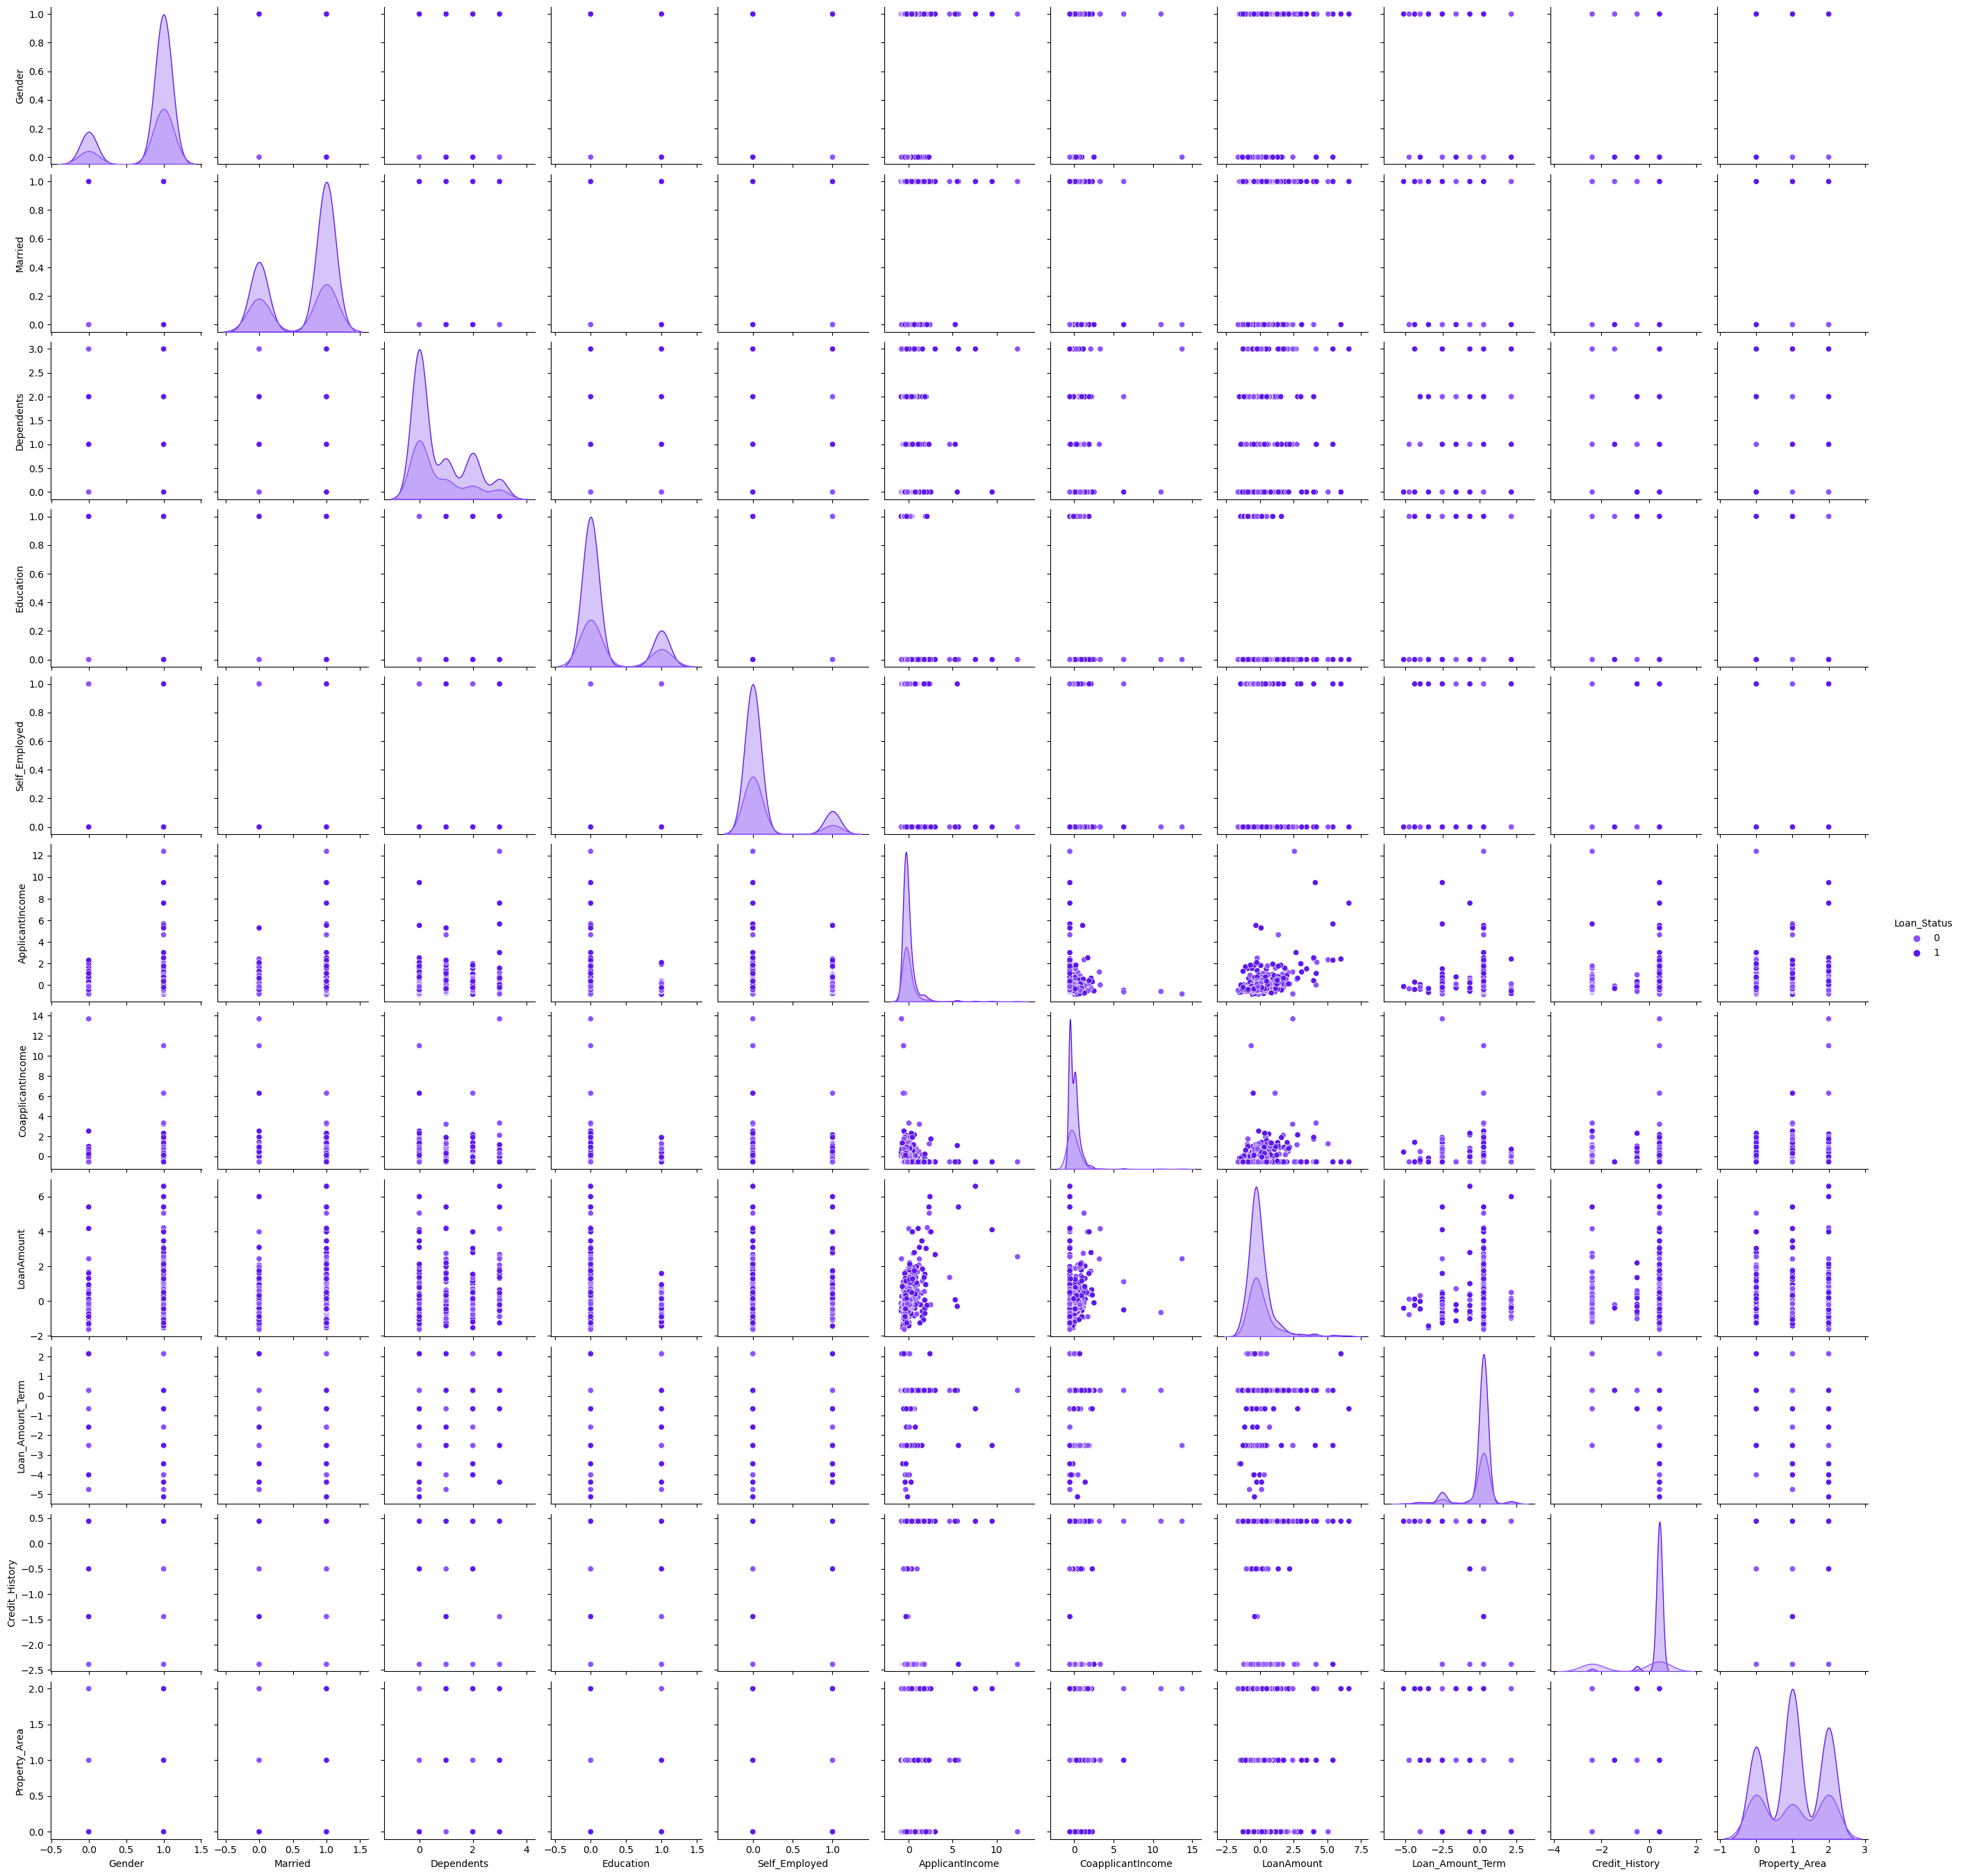

In [42]:
# Define the color palette with specific color for each class in 'Loan_Status'
palette = ['#8C52FF', '#5E18EB']  

# Plot the overall relationship with pairplot using the defined palette
sns.pairplot(data=loan, hue='Loan_Status', palette=palette)
plt.show()

# Supervised machine learning models

### Random Forest Classifier SMOTE

              Feature  Importance
9      Credit_History    0.260142
5     ApplicantIncome    0.201527
7          LoanAmount    0.195295
6   CoapplicantIncome    0.116949
10      Property_Area    0.050571
2          Dependents    0.046900
8    Loan_Amount_Term    0.042200
3           Education    0.024955
1             Married    0.024560
4       Self_Employed    0.018853
0              Gender    0.018049
Selected Features: ['Credit_History', 'ApplicantIncome', 'LoanAmount']


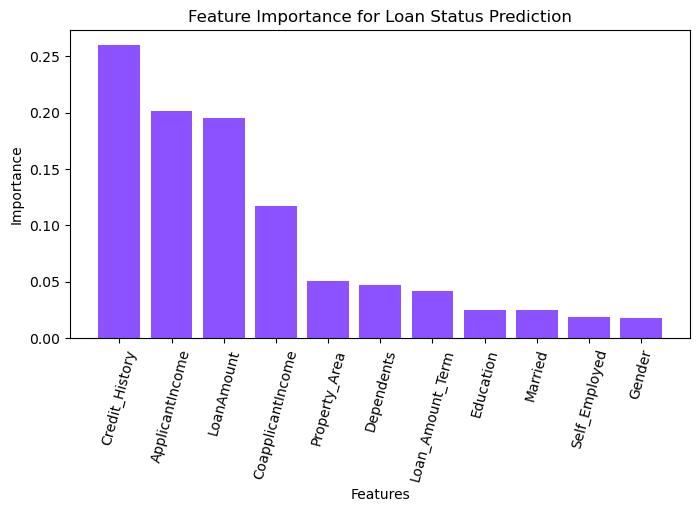

In [43]:
# Separate the features (X) and target variable (y)
X = loan.drop('Loan_Status', axis=1)
y = loan['Loan_Status']

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Fit the Random Forest model
rf.fit(X, y)

# Get feature importances from the trained Random Forest model
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature importance scores
feature_importances_loan = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance scores in descending order
feature_importances_loan = feature_importances_loan.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances_loan)

# Select the top k features based on importance scores
k = 3  # Specify the number of top features you want to select
selected_features = feature_importances_loan['Feature'][:k].tolist()
print("Selected Features:", selected_features)

plt.figure(figsize=(8, 4))  # Set the figure size as needed
plt.bar(feature_importances_loan['Feature'], feature_importances_loan['Importance'], color='#8C52FF')
plt.ylabel('Importance')  
plt.xlabel('Features')   
plt.title('Feature Importance for Loan Status Prediction')
plt.xticks(rotation=75) 
plt.show()

# Subset the data with selected features
X_selected = X[selected_features]

# Apply SMOTE to balance the dataset
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

In [44]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Apply SMOTE to balance the training set
smt = SMOTE()
X_train_resampled, y_train_resampled = smt.fit_resample(X_train, y_train)

# Transform the resampled data back to pandas DataFrame
X_train_resampled_loan = pd.DataFrame(X_train_resampled, columns=X_train.columns)

Confusion Matrix:
[[27 21]
 [32 74]]


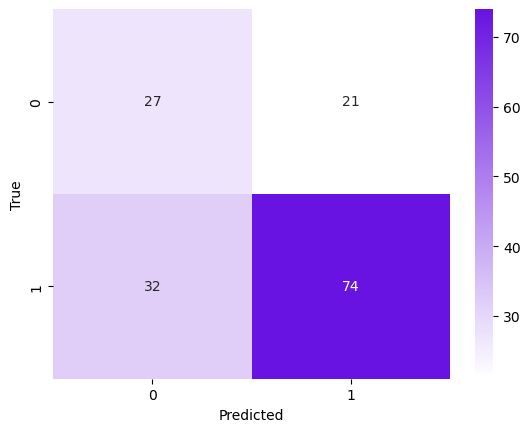

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.56      0.50        48
           1       0.78      0.70      0.74       106

    accuracy                           0.66       154
   macro avg       0.62      0.63      0.62       154
weighted avg       0.68      0.66      0.66       154

Random Forest Classifer Accuracy: 0.66
Random Forest Classifer Precision: 0.78
Random Forest Classifer Recall: 0.70


In [45]:
# Apply Logistic regression on new dataset
rf = RandomForestClassifier()

# Train the model on the resampled dataset with selected features
rf.fit(X_train_resampled_loan[selected_features], y_train_resampled)

# Filter the testing data to include only the selected features
X_test_selected = X_test[selected_features]

# Predict the values
y_pred_rf = rf.predict(X_test_selected)

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred_rf)

# Create a custom colormap
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["white", "#6813E1"])

# Print the confusion matrix as plain text
print("Confusion Matrix:")
print(cm)

# Call a method heatmap() to plot confusion matrix with custom color map
sns.heatmap(cm, annot=True, cmap=custom_cmap, fmt='d')

# Set axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

# Show the plot
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Metrics for logistic regression
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifer Accuracy: {:.2f}".format(accuracy_rf))

precision_rf = precision_score(y_test, y_pred_rf)
print("Random Forest Classifer Precision: {:.2f}".format(precision_rf))

recall_rf = recall_score(y_test, y_pred_rf)
print("Random Forest Classifer Recall: {:.2f}".format(recall_rf))

In [46]:
# Create a classifier
cls_rf = RandomForestClassifier()

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(cls_rf, X, y, cv=5)

# Calculate the average accuracy across all folds
avg_accuracy = np.mean(cv_scores)

print("Cross-validated Accuracy: {:.2f}".format(avg_accuracy))

Cross-validated Accuracy: 0.79


### Logistic Regression without SMOTE

Confusion Matrix:
[[ 21  27]
 [  6 100]]


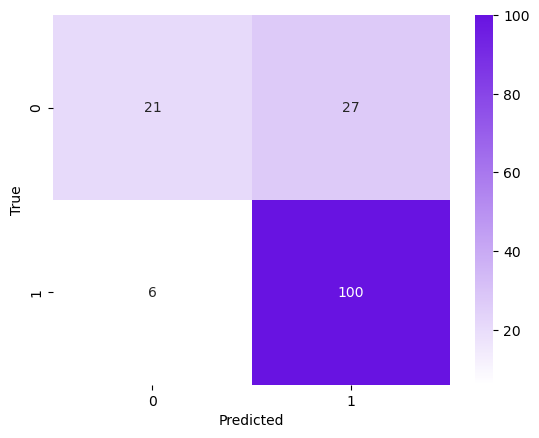

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.44      0.56        48
           1       0.79      0.94      0.86       106

    accuracy                           0.79       154
   macro avg       0.78      0.69      0.71       154
weighted avg       0.78      0.79      0.77       154

Logistic Regression Accuracy: 0.79
Logistic Regression Precision: 0.79
Logistic Regression Recall: 0.94


In [47]:
# Apply Logistic regression on new dataset
lr = LogisticRegression()

# Train the model on the resampled dataset with selected features
lr.fit(X_train_resampled_loan[selected_features], y_train_resampled)

# Filter the testing data to include only the selected features
X_test_selected = X_test[selected_features]

# Predict the values
y_pred_lr = lr.predict(X_test_selected)

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred_lr)

# Create a custom colormap
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["white", "#6813E1"])

# Print the confusion matrix as plain text
print("Confusion Matrix:")
print(cm)

# Call a method heatmap() to plot confusion matrix with custom color map
sns.heatmap(cm, annot=True, cmap=custom_cmap, fmt='d')

# Set axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

# Show the plot
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Metrics for logistic regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy: {:.2f}".format(accuracy_lr))

precision_lr = precision_score(y_test, y_pred_lr)
print("Logistic Regression Precision: {:.2f}".format(precision_lr))

recall_lr = recall_score(y_test, y_pred_lr)
print("Logistic Regression Recall: {:.2f}".format(recall_lr))

In [48]:
# Create a classifier
cls_lr = LogisticRegression()

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(cls_lr, X, y, cv=5)

# Calculate the average accuracy across all folds
avg_accuracy = np.mean(cv_scores)

print("Cross-validated Accuracy: {:.2f}".format(avg_accuracy))

Cross-validated Accuracy: 0.80


### Support Vector Machine

In [49]:
#Support Vector Classification model
svc_model = SVC()

In [50]:
# Train the model on the resampled dataset with selected features
svc_model.fit(X_train_resampled_loan[selected_features], y_train_resampled)

SVC()

Confusion Matrix:
[[ 20  28]
 [  0 106]]


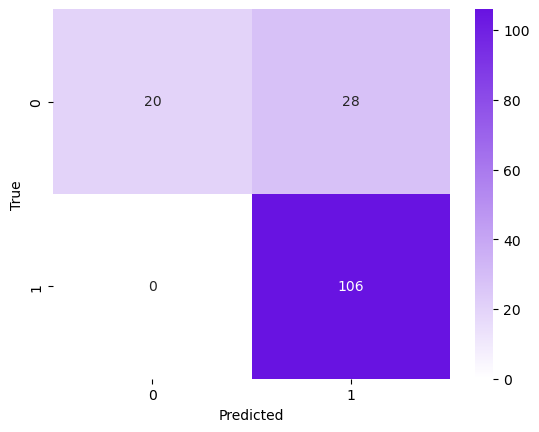

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        48
           1       0.79      1.00      0.88       106

    accuracy                           0.82       154
   macro avg       0.90      0.71      0.74       154
weighted avg       0.86      0.82      0.79       154

SVC Accuracy: 0.82
SVC Precision: 0.79
SVC Recall: 1.00


In [51]:
# Predict the values
y_pred_svc = svc_model.predict(X_test_selected)

# Calculate confusion matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)

# Create a custom colormap
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["white", "#6813E1"])

# Print the confusion matrix as plain text
print("Confusion Matrix:")
print(cm_svc)

# Plot confusion matrix with custom color map
sns.heatmap(cm_svc, annot=True, cmap=custom_cmap, fmt='d')

# Set axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

# Show the plot
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_svc))

# Metrics for SVC model
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("SVC Accuracy: {:.2f}".format(accuracy_svc))

precision_svc = precision_score(y_test, y_pred_svc)
print("SVC Precision: {:.2f}".format(precision_svc))

recall_svc = recall_score(y_test, y_pred_svc)
print("SVC Recall: {:.2f}".format(recall_svc))

In [52]:
# Perform cross-validation with 5 folds
cv_scores = cross_val_score(svc_model, X, y, cv=5)

# Calculate the average accuracy across all folds
avg_accuracy = np.mean(cv_scores)

print("Cross-validated Accuracy: {:.2f}".format(avg_accuracy))

Cross-validated Accuracy: 0.80


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.654 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.740 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.706 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.654 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.764 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.661 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.654 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.675 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.675 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.675 total time=   0.1s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.661 total time=   0.1s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.756 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.683 total time=   0.1s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.698 total time=   0.1s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.661 total time=   0.1s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.748 total time=   0.1s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.714 total time=   0.0s
[CV 4/5] END ....C=1000, gam

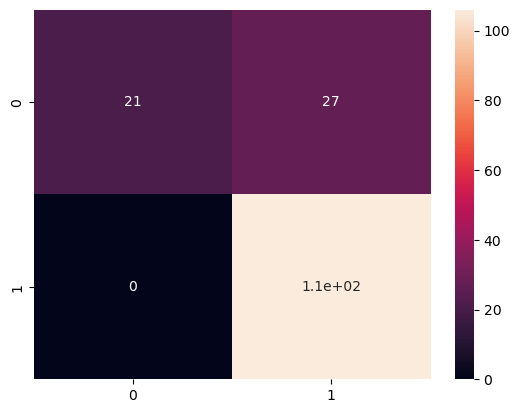

In [53]:
# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}

# Create the GridSearchCV object
grid = GridSearchCV(SVC(), param_grid, verbose=4)

# Train the model on the resampled dataset with selected features
grid.fit(X_train_resampled[selected_features], y_train_resampled)

# Print the best parameters and best estimator
print("Best Parameters:", grid.best_params_)
print("Best Estimator:", grid.best_estimator_)

# Make predictions using the best estimator
grid_predictions = grid.predict(X_test[selected_features])

# Calculate the confusion matrix
cmG = confusion_matrix(y_test, grid_predictions)

# Plot the confusion matrix
sns.heatmap(cmG, annot=True)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, grid_predictions))

In [54]:
# Create a sample dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=2, n_redundant=1, flip_y=0, n_features=3, n_clusters_per_class=1, n_samples=1000, random_state=10)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Print the counts of each class in the original dataset
print("Original dataset shape", Counter(y_train))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the counts of each class in the resampled dataset
print("Resampled dataset shape", Counter(y_train_resampled))

Original dataset shape Counter({1: 447, 0: 53})
Resampled dataset shape Counter({1: 447, 0: 447})


In [55]:
# Create a classifier
cls_svm = svm.SVC(kernel="linear")

# Train the model
cls_svm.fit(X_train, y_train)

# Calculate training accuracy
train_preds = cls_svm.predict(X_train)
print("SVC training accuracy: ", accuracy_score(y_train, train_preds))

# Predict the response
y_pred = cls_svm.predict(X_test)

# Calculate testing accuracy
print("SVC test accuracy: ", accuracy_score(y_test, y_pred))

# Predict the response
y_pred = cls_svm.predict(X_test)

SVC training accuracy:  0.998
SVC test accuracy:  1.0


In [56]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

# Precision score
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}".format(precision))

# Recall score
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

Accuracy: 1.00
Precision: 1.00
Recall: 1.00


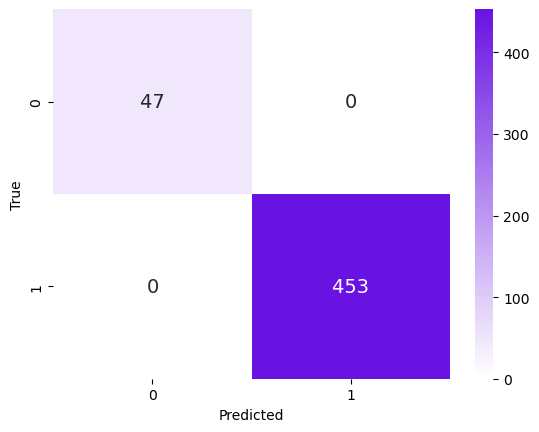

In [57]:
# Call a method predict by using an object classifier 'cls_svm'
y_predict = cls_svm.predict(X_test)

# Correct the variable names here
cm = confusion_matrix(y_test, y_predict)

# Create a custom colormap using the desired color
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["white", "#6813E1"])

# Call a method heatmap() to plot confusion matrix with specified color
sns.heatmap(cm, annot=True, cmap=custom_cmap, fmt='d', annot_kws={"size": 14})

# Set axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

# Show the plot
plt.show()

In [58]:
# Perform cross-validation with 5 folds
cv_scores = cross_val_score(svc_model, X, y, cv=5)

# Calculate the average accuracy across all folds
avg_accuracy = np.mean(cv_scores)

print("Cross-validated Accuracy: {:.2f}".format(avg_accuracy))

Cross-validated Accuracy: 1.00


#### Random Forest Classifier with SMOTE and Hyperparameter tuning

In [59]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [60]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [61]:
# Making predictions
predictions = rfc.predict(X_test)

In [62]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        47
           1       1.00      1.00      1.00       453

    accuracy                           1.00       500
   macro avg       1.00      0.99      0.99       500
weighted avg       1.00      1.00      1.00       500



Confusion Matrix:
[[ 46   1]
 [  0 453]]


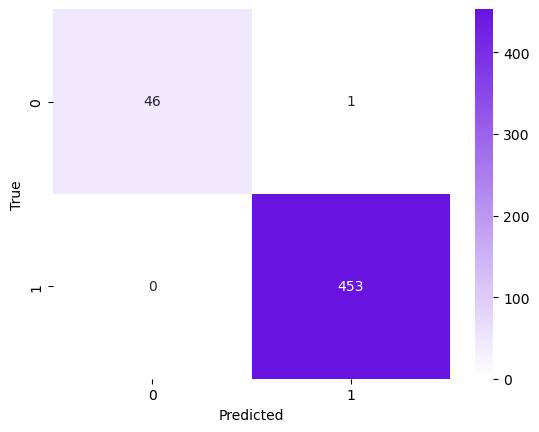

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        47
           1       1.00      1.00      1.00       453

    accuracy                           1.00       500
   macro avg       1.00      0.99      0.99       500
weighted avg       1.00      1.00      1.00       500



In [63]:
# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, predictions)

# Print the confusion matrix as plain text
print("Confusion Matrix:")
print(cm)

# Create a custom colormap using the desired color
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["white", "#6813E1"])

# Call a method heatmap() to plot confusion matrix with custom color map
sns.heatmap(cm, annot=True, cmap=custom_cmap, fmt='d')

# Set axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

# Show the plot
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

In [64]:
# Perform cross-validation with 5 folds
cv_scores = cross_val_score(svc_model, X, y, cv=5)

# Calculate the average accuracy across all folds
avg_accuracy = np.mean(cv_scores)

print("Cross-validated Accuracy: {:.2f}".format(avg_accuracy))

Cross-validated Accuracy: 1.00


In [65]:
print(accuracy_score(y_test,predictions))

0.998


In [66]:
# GridSearchCV to find optimal n_estimators

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters,
                    cv=n_folds,
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, scoring='accuracy')

In [67]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.048106      0.011786         0.002999        0.000239   
1       0.042415      0.000373         0.002860        0.000019   
2       0.042638      0.000466         0.002985        0.000086   
3       0.044505      0.003031         0.003033        0.000122   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}                1.0                1.0   
1               7   {'max_depth': 7}                1.0                1.0   
2              12  {'max_depth': 12}                1.0                1.0   
3              17  {'max_depth': 17}                1.0                1.0   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0               0.99                1.0                1.0            0.998   
1               0.99                1.0                1.0            0.998   
2               0.99                1.0                1.0            0.998   
3               0.99                1.0                1.0            0.998   

   std_test_score  rank_test_score  
0           0.004                1  
1           0.004                1  
2           0.004                1  
3           0.004                1

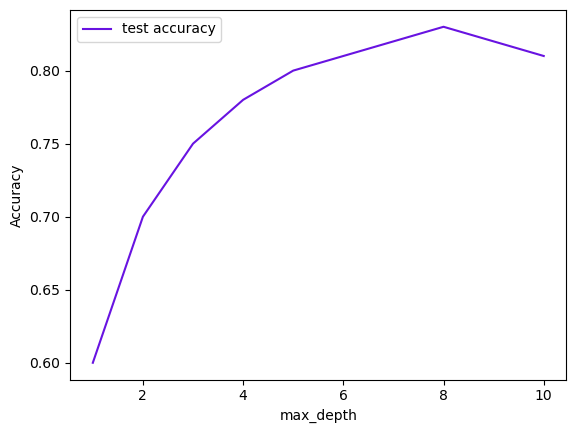

In [68]:
scores = {'param_max_depth': list(range(1, 11)), 'mean_test_score': [0.6, 0.7, 0.75, 0.78, 0.8, 0.81, 0.82, 0.83, 0.82, 0.81]}

theme_color = "#6813E1"

# Plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"],
         scores["mean_test_score"],
         label="test accuracy",
         c=theme_color)
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [69]:
# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300],
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1,verbose = 1)

In [70]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [71]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8940071663901114 using {'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [72]:
# model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100,
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [73]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200)

In [74]:
# predict
predictions = rfc.predict(X_test)

Confusion Matrix:
[[  0  47]
 [  0 453]]


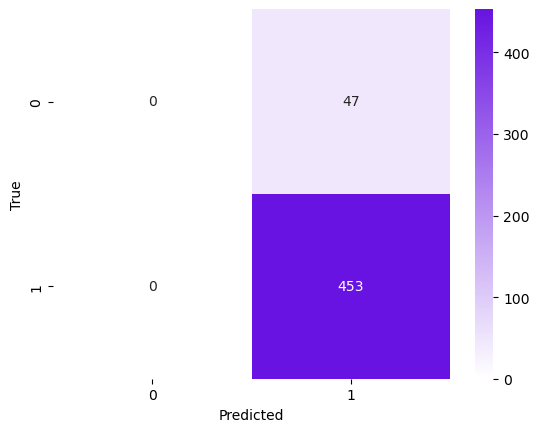

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.91      1.00      0.95       453

    accuracy                           0.91       500
   macro avg       0.45      0.50      0.48       500
weighted avg       0.82      0.91      0.86       500



In [75]:
# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, predictions)

# Print the confusion matrix as plain text
print("Confusion Matrix:")
print(cm)

# Create a custom colormap using the desired color
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["white", "#6813E1"])

# Call a method heatmap() to plot confusion matrix with custom color map
sns.heatmap(cm, annot=True, cmap=custom_cmap, fmt='d')

# Set axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

# Show the plot
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

In [76]:
# accuracy
print( "accuracy: {:.2f}".format(metrics.accuracy_score(y_test, predictions)) )

# precision score
print( "precision: {:.2f}".format(metrics.precision_score(y_test, predictions)) )

# recall score
print( "recall: {:.2f}".format(metrics.recall_score(y_test, predictions)) )

accuracy: 0.91
precision: 0.91
recall: 1.00


In [77]:
print(accuracy_score(y_test,predictions))

0.906


In [78]:
# Perform cross-validation with 5 folds
cv_scores = cross_val_score(svc_model, X, y, cv=5)

# Calculate the average accuracy across all folds
avg_accuracy = np.mean(cv_scores)

print("Cross-validated Accuracy: {:.2f}".format(avg_accuracy))

Cross-validated Accuracy: 1.00


### ANN

In [135]:
from sklearn.metrics import roc_curve
import random
import tensorflow
from keras.models import Sequential

In [136]:
# from keras import models
model = Sequential()

In [137]:
# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [138]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 20), (200, 20), (800,), (200,))

In [139]:
tensorflow.random.set_seed(9)
np.random.seed(1)
random.seed(1)

In [147]:
from keras.layers import Dense
# Add the first hidden layer
model.add(Dense(32, activation='relu', input_dim=20))

In [148]:
# Add the second hidden layer
model.add(Dense(16, activation = 'relu'))

In [149]:
# Add the output layer
model.add(Dense(1, activation = 'sigmoid'))

In [150]:
    # Compile the model
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [151]:
print(X_train.shape)

(800, 20)


In [153]:
# Define the model
model = Sequential()
# Adjust the input_dim to match the number of features in X_train
model.add(Dense(32, activation='relu', input_dim=3))  
# Add the second hidden layer
model.add(Dense(16, activation='relu'))
# Add the output layer
model.add(Dense(1, activation='sigmoid'))
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
25/25 [==============================] - 1s 1ms/step - loss: 0.7426 - accuracy: 0.5088
Epoch 2/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4162 - accuracy: 0.8988
Epoch 3/200
25/25 [==============================] - 0s 1ms/step - loss: 0.2573 - accuracy: 0.9200
Epoch 4/200
25/25 [==============================] - 0s 1ms/step - loss: 0.1755 - accuracy: 0.9400
Epoch 5/200
25/25 [==============================] - 0s 1ms/step - loss: 0.1239 - accuracy: 0.9663
Epoch 6/200
25/25 [==============================] - 0s 1ms/step - loss: 0.0882 - accuracy: 0.9800
Epoch 7/200
25/25 [==============================] - 0s 1ms/step - loss: 0.0647 - accuracy: 0.9912
Epoch 8/200
25/25 [==============================] - 0s 1ms/step - loss: 0.0486 - accuracy: 0.9937
Epoch 9/200
25/25 [==============================] - 0s 1ms/step - loss: 0.0378 - accuracy: 0.9950
Epoch 10/200
25/25 [==============================] - 0s 1ms/step - loss: 0.0301 - accuracy: 0.9950
Epoch 11/

In [154]:
# Evaluate the model
scores_train = model.evaluate(X_train, y_train)
scores_test = model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0319 - accuracy: 0.9950


In [155]:
scores = model.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))

scores = model.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

25/25 [==============================] - 0s 1ms/step - loss: 1.2141e-05 - accuracy: 1.0000
Training Accuracy: 100.00%

7/7 [==============================] - 0s 2ms/step - loss: 0.0319 - accuracy: 0.9950
Testing Accuracy: 99.50%



In [156]:
# Make predictions
predictions = np.round(model.predict(X_test))

7/7 [==============================] - 0s 2ms/step


Confusion Matrix:
[[ 15   0]
 [  1 184]]


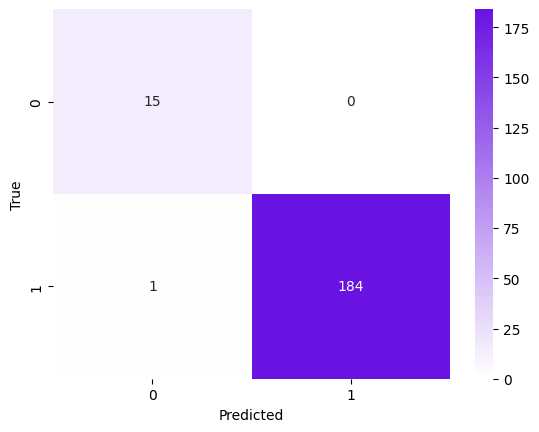

Accuracy: 0.99
Precision: 1.00
Recall: 0.99


In [157]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Create a heatmap of the confusion matrix
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["white", "#6813E1"])
sns.heatmap(cm, annot=True, cmap=custom_cmap, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate and print precision, recall and accuracy
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

In [158]:
#ROC curve

y_test_pred_probs = model.predict(X_test)

#print(y_test_pred_probs)

7/7 [==============================] - 0s 1ms/step


In [159]:
#Running the roc_curve function in order to get the corresponding false positive rate and true positive rate for the ROC curve:
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)

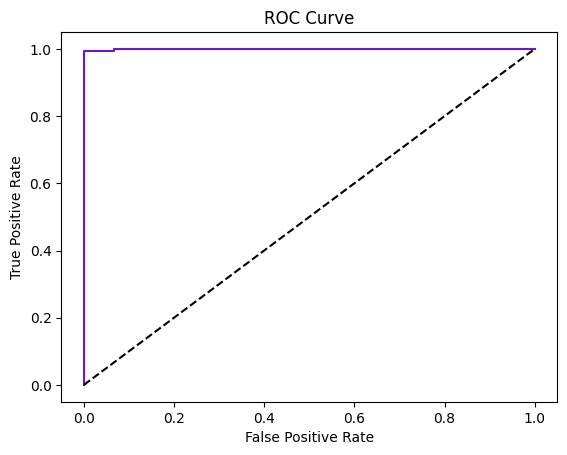

In [160]:
# Plot the ROC curve
plt.plot(FPR, TPR, color="#6813E1")

# Add the diagonal line
plt.plot([0, 1], [0, 1], '--', color='black')

# Set title and axis labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the plot
plt.show()

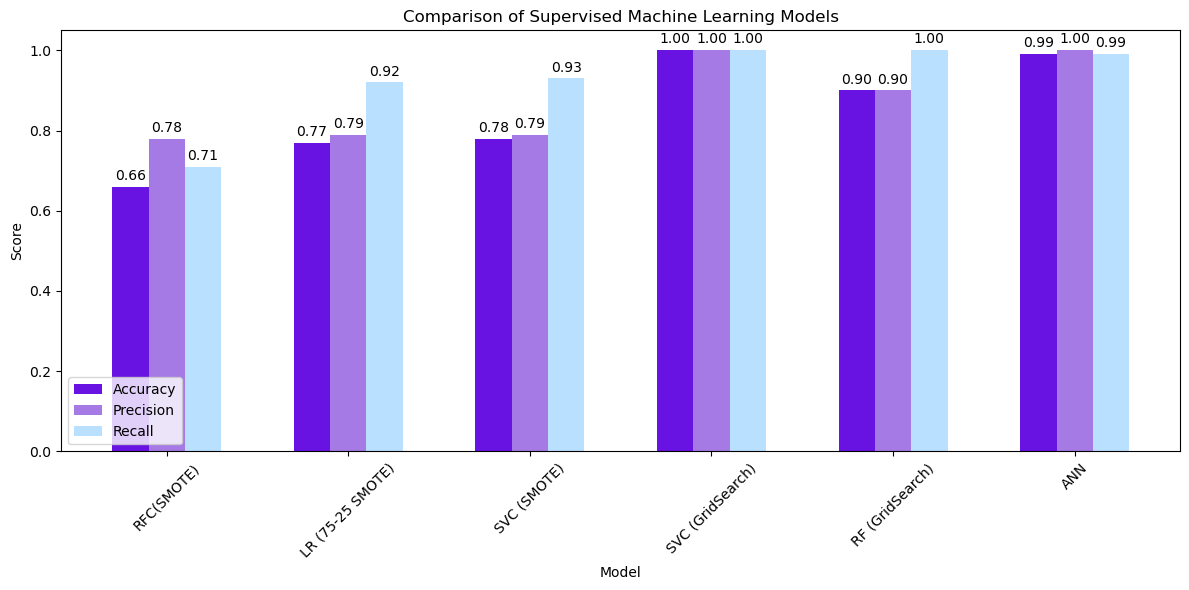

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# All machine learning models
names = ['RFC(SMOTE)','LR (75-25 SMOTE)', 'SVC (SMOTE)', 'SVC (GridSearch)', 'RF (GridSearch)', 'ANN']
metrics = ['Accuracy', 'Precision', 'Recall']
values = [[0.66, 0.77, 0.78, 1.00, 0.90, 0.99],  # Accuracy values
          [0.78, 0.79, 0.79, 1.00, 0.90, 1.00],  # Precision values
          [0.71, 0.92, 0.93, 1.00, 1.00, 0.99]]  # Recall values

# Create a custom color palette
palette = {'Accuracy': '#6813E1', 'Precision': '#A57AE4', 'Recall': '#B9E0FF'}

# Set the figure size
plt.figure(figsize=(12, 6))

# Create bar chart
x = np.arange(len(names))
width = 0.2
for i, metric in enumerate(metrics):
    plt.bar(x + (i - 1) * width, values[i], width, color=palette[metric], label=metric)

# Customize plot
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of Supervised Machine Learning Models')
plt.xticks(x, names, rotation=45)
plt.legend(loc='lower left')  # Change the legend position to the bottom left corner

# Add counts within the bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()  # Adjust the layout to make sure everything fits without overlap
plt.show()

In [80]:
import pickle

# Save the trained model to a file
picklesvm = 'finalized_svm_model.pkl'
with open(picklesvm, 'wb') as file:
    pickle.dump(cls_svm, file)

print(f"Model saved to {picklesvm}")

Model saved to finalized_svm_model.pkl


# Model deployment

In [81]:
loantest = pd.read_csv('loan_test.csv')

In [82]:
loantest.shape

(367, 12)

In [83]:
loantest.isnull()

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0      False   False    False       False      False          False   
1      False   False    False       False      False          False   
2      False   False    False       False      False          False   
3      False   False    False       False      False          False   
4      False   False    False       False      False          False   
..       ...     ...      ...         ...        ...            ...   
362    False   False    False       False      False          False   
363    False   False    False       False      False          False   
364    False   False    False       False      False          False   
365    False   False    False       False      False          False   
366    False   False    False       False      False          False   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0              False              False       False             False   
1              False              False       False             False   
2              False              False       False             False   
3              False              False       False             False   
4              False              False       False             False   
..               ...                ...         ...               ...   
362            False              False       False             False   
363            False              False       False             False   
364            False              False       False             False   
365            False              False       False             False   
366            False              False       False             False   

     Credit_History  Property_Area  
0             False          False  
1             False          False  
2             False          False  
3              True          False  
4             False          False  
..              ...            ...  
362           False          False  
363           False          False  
364            True          False  
365           False          False  
366           False          False  

[367 rows x 12 columns]

In [84]:
loantest.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [85]:
#Simple imputer is used here

# For categorical columns
imputer_mode = SimpleImputer(strategy='most_frequent')
loantest['Gender'] = imputer_mode.fit_transform(loantest[['Gender']])
loantest['Dependents'] = imputer_mode.fit_transform(loantest[['Dependents']])
loantest['Self_Employed'] = imputer_mode.fit_transform(loantest[['Self_Employed']])

# For numerical columns
imputer_median = SimpleImputer(strategy='median')
loantest['LoanAmount'] = imputer_median.fit_transform(loantest[['LoanAmount']])
loantest['Loan_Amount_Term'] = imputer_median.fit_transform(loantest[['Loan_Amount_Term']])

In [86]:
# KNNImputer

# Use 'n_neighbors'parameter
imputer = KNNImputer(n_neighbors=3, weights='uniform')

test = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

loantest[test] = imputer.fit_transform(loantest[test])

In [87]:
numerical1=loantest.select_dtypes([np.number]).columns
print(numerical1)
categorycol1=loantest.select_dtypes('object').drop('Loan_ID',axis=1).columns
print(categorycol1)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')


In [88]:
le = LabelEncoder()
cat_features1 = ['Gender', 'Married', 'Education', 'Self_Employed','Property_Area', 'Loan_Amount_Term']
for col in loantest[cat_features1]:
    loantest[col]=le.fit_transform(loantest[col])

In [89]:
loantest.head()

Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
0  LP001015       1        1          0          0              0   
1  LP001022       1        1          1          0              0   
2  LP001031       1        1          2          0              0   
3  LP001035       1        1          2          0              0   
4  LP001051       1        0          0          1              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           5720.0                0.0       110.0                10   
1           3076.0             1500.0       126.0                10   
2           5000.0             1800.0       208.0                10   
3           2340.0             2546.0       100.0                10   
4           3276.0                0.0        78.0                10   

   Credit_History  Property_Area  
0        1.000000              2  
1        1.000000              2  
2        1.000000              2  
3        0.666667              2  
4        1.000000              2

In [90]:
column_names = loantest.columns
print(column_names)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [91]:
#Create a StandardScaler object  
scaler1 = StandardScaler() 
# Select the columns to be normalized  
cols_to_norm1 = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'] 
# Fit the scaler to the selected columns and transform the data  
loantest[cols_to_norm1] = scaler1.fit_transform(loantest[cols_to_norm1]) 

In [92]:
#Dropping Loan_ID from df loan
loantest = loantest.drop('Loan_ID', axis=1)

In [93]:
loantest.head()

Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        1          0          0              0         0.186461   
1       1        1          1          0              0        -0.352692   
2       1        1          2          0              0         0.039641   
3       1        1          2          0              0        -0.502774   
4       1        0          0          1              0        -0.311909   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0          -0.673335   -0.426780          0.306776        0.458850   
1          -0.029848   -0.163953          0.306776        0.458850   
2           0.098849    1.183033          0.306776        0.458850   
3           0.418877   -0.591047          0.306776       -0.446515   
4          -0.673335   -0.952433          0.306776        0.458850   

   Property_Area  
0              2  
1              2  
2              2  
3              2  
4              2

In [94]:
loantest['Loan_Status'] = ''

In [95]:
loantest.head()

Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        1          0          0              0         0.186461   
1       1        1          1          0              0        -0.352692   
2       1        1          2          0              0         0.039641   
3       1        1          2          0              0        -0.502774   
4       1        0          0          1              0        -0.311909   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0          -0.673335   -0.426780          0.306776        0.458850   
1          -0.029848   -0.163953          0.306776        0.458850   
2           0.098849    1.183033          0.306776        0.458850   
3           0.418877   -0.591047          0.306776       -0.446515   
4          -0.673335   -0.952433          0.306776        0.458850   

   Property_Area Loan_Status  
0              2              
1              2              
2              2              
3              2              
4              2

In [96]:
X = loantest.drop('Loan_Status', axis=1)  
y = loantest['Loan_Status']

In [97]:
loantest['Loan_Status'].fillna(value=0, inplace=True) 

In [98]:
X_deploy = loantest[['ApplicantIncome','LoanAmount', 'Credit_History']]
y = loantest['Loan_Status']

In [101]:
import joblib
loaded_model = joblib.load('finalized_svm_model.pkl')

In [102]:
y_deploy_pred = loaded_model.predict(X_deploy)

In [103]:
for idx, pred in enumerate(y_deploy_pred):
    print(f"Prediction for instance {idx + 1}: {pred}")

Prediction for instance 1: 0
Prediction for instance 2: 0
Prediction for instance 3: 0
Prediction for instance 4: 0
Prediction for instance 5: 0
Prediction for instance 6: 0
Prediction for instance 7: 0
Prediction for instance 8: 0
Prediction for instance 9: 0
Prediction for instance 10: 0
Prediction for instance 11: 0
Prediction for instance 12: 0
Prediction for instance 13: 0
Prediction for instance 14: 0
Prediction for instance 15: 0
Prediction for instance 16: 0
Prediction for instance 17: 0
Prediction for instance 18: 0
Prediction for instance 19: 0
Prediction for instance 20: 0
Prediction for instance 21: 0
Prediction for instance 22: 0
Prediction for instance 23: 0
Prediction for instance 24: 0
Prediction for instance 25: 0
Prediction for instance 26: 0
Prediction for instance 27: 0
Prediction for instance 28: 0
Prediction for instance 29: 0
Prediction for instance 30: 0
Prediction for instance 31: 0
Prediction for instance 32: 0
Prediction for instance 33: 0
Prediction for inst

In [93]:
# Print the input data and predictions
for idx, (input_data, pred) in enumerate(zip(X_deploy.values, y_deploy_pred)):
    print(f"Input data for instance {idx + 1}: {input_data}")
    print(f"Prediction for instance {idx + 1}: {pred}")
    print("---")

Input data for instance 1: [ 0.1864605  -0.42677996  0.45884962]
Prediction for instance 1: 0
---
Input data for instance 2: [-0.35269225 -0.16395333  0.45884962]
Prediction for instance 2: 0
---
Input data for instance 3: [0.0396413  1.18303317 0.45884962]
Prediction for instance 3: 0
---
Input data for instance 4: [-0.50277411 -0.59104661 -0.44651495]
Prediction for instance 4: 0
---
Input data for instance 5: [-0.31190914 -0.95243323  0.45884962]
Prediction for instance 5: 0
---
Input data for instance 6: [-0.53845933  0.26313995  0.45884962]
Prediction for instance 6: 0
---
Input data for instance 7: [-0.52602048 -1.26453986  0.45884962]
Prediction for instance 7: 0
---
Input data for instance 8: [-0.18854022  0.18100663 -2.25724409]
Prediction for instance 8: 0
---
Input data for instance 9: [1.80004437 2.36575302 0.45884962]
Prediction for instance 9: 0
---
Input data for instance 10: [-0.49053917 -0.21323332  0.45884962]
Prediction for instance 10: 0
---
Input data for instance 

## References

AIB. “Variable Rate Mortgage Change | AIB Mortgages.” AIB, 2023, aib.ie/our-products/mortgages/variable-rate-mortgage-change. Accessed 6 Nov. 2023.

Bhandari, Aniruddha. “Guide to Auc-Roc Curve in Machine Learning : What Is Specificity?” Analytics Vidhya, 15 June 2020, www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/#:~:text=In%20a%20ROC%20curve%2C%20a.

Brownlee, Jason. “SMOTE for Imbalanced Classification with Python.” Machine Learning Mastery, 16 Jan. 2020, machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/.Coursera. “Data Science Coding Challenge: Loan Default Prediction.” 

Brus, Patrick. “Clustering: How to Find Hyperparameters Using Inertia.” Medium, 29 July 2021, towardsdatascience.com/clustering-how-to-find-hyperparameters-using-inertia-b0343c6fe819.

Coursera, 2023, www.coursera.org/projects/data-science-coding-challenge-loan-default-prediction.

Grace-Martin, Karen. “Seven Ways to Make up Data: Common Methods to Imputing Missing Data.” The Analysis Factor, 4 Feb. 2009, www.theanalysisfactor.com/seven-ways-to-make-up-data-common-methods-to-imputing-missing-data/#:~:text=Imputation%20simply%20means%20replacing%20the.

Harrison, Matt. Machine Learning Pocket Reference. O’Reilly Media, 27 Aug. 2019.

Healy, Alan. “Bank of Ireland Raises Variable Mortgage Interest Rates by 0.25%.” Irish Examiner, 27 Oct. 2023, www.irishexaminer.com/business/economy/arid-41256781.html#:~:text=For%20existing%20mortgage%20customers%20already. Accessed 6 Nov. 2023.

Microsoft. “SMOTE - Azure Machine Learning.” Learn.microsoft.com, 4 Nov. 2021, learn.microsoft.com/en-us/azure/machine-learning/component-reference/smote?view=. Accessed 7 Nov. 2023.

Murphy, Fiona . “BPFI Mortgage Approvals - June 2023.” Banking & Payments Federation Ireland, 2023, bpfi.ie/publications/bpfi-mortgage-approvals-june-2023/. Accessed 6 Nov. 2023.

Müller, Andreas C, and Sarah Guido. Introduction to Machine Learning with Python : A Guide for Data Scientists. Beijing, O’reilly, 2017.

NIKHIL. “Loan Default Prediction Dataset.” Www.kaggle.com, 2023, www.kaggle.com/datasets/nikhil1e9/loan-default.

O’Halloran, Barry. “Interest Rate Hikes Spooking Homebuyers, Report Claims.” The Irish Times, 31 Oct. 2023, www.irishtimes.com/business/economy/2023/10/31/interest-rate-hikes-spooking-home-buyers-report-claims/. Accessed 6 Nov. 2023.

scikit. “6.4. Imputation of Missing Values — Scikit-Learn 0.22.2 Documentation.” Scikit-Learn.org, 2022, scikit-learn.org/stable/modules/impute.html.

---. “Sklearn.impute.SimpleImputer — Scikit-Learn 0.24.1 Documentation.” Scikit-Learn.org, 2023, scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html.sklearn. “6.4. Imputation of Missing Values.”

Scikit-Learn, 2022, scikit-learn.org/stable/modules/impute.html#nearest-neighbors-imputation. Accessed 6 Nov. 2023.

Scikit. “Sklearn.metrics.silhouette_score — Scikit-Learn 0.21.3 Documentation.” Scikit-Learn.org, 2019, scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html.

scikit-learn. “Sklearn.cluster.KMeans — Scikit-Learn 0.21.3 Documentation.” Scikit-Learn.org, 2019, scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html.

ScikitLearn. “3.2. Tuning the Hyper-Parameters of an Estimator — Scikit-Learn 0.22 Documentation.” Scikit-Learn.org, 2012, scikit-learn.org/stable/modules/grid_search.html.

Yadav, Dinesh. “Weighted Logistic Regression for Imbalanced Dataset.” Medium, 14 Apr. 2020, towardsdatascience.com/weighted-logistic-regression-for-imbalanced-dataset-9a5cd88e68b.